### 1. Data Loading and Basic Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lohithramesh/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lohithramesh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df = pd.read_csv('/Users/lohithramesh/Desktop/M.S in Data Science/Semester 4/Text Mining/Project/Data/final_articles_after_labeling.csv')

In [4]:
df.head()

,Label,content
0,Negative,"Macomb, Detroit, Michigan-President Donald Tru..."
1,Negative,Washington: US President Donald Trump and his ...
2,Positive,Associate head coach David Patrick and his LSU...
3,Negative,The New York Yankees officially have their ful...
4,Negative,Among the documents obtained by RNZ is a lette...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    919 non-null    object
 1   content  919 non-null    object
dtypes: object(2)
memory usage: 14.5+ KB


In [6]:
df.describe()

,Label,content
count,919,919
unique,2,919
top,Negative,"Macomb, Detroit, Michigan-President Donald Tru..."
freq,488,1


In [7]:
df["Label"].value_counts()

Label
Negative    488
Positive    431
Name: count, dtype: int64

In [8]:
df.isnull().sum()

Label      0
content    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
print(df.loc[0, 'content'])

Macomb, Detroit, Michigan-President Donald Trump accused the US bureaucracy of massive fraud, waste, and abuse, citing an investigation led by Elon Musk that uncovered billions of dollars in misused funds. He condemned judges for obstructing his reform agenda, calling their block on his $3 billion federal grant freeze “intolerable judicial interference.”

Trump also charged the Pentagon with corruption and financial mismanagement, referencing a 2023 audit that found $2.1 trillion unaccounted for. He accused USAID of funneling billions into mainstream media as payoffs for pro-Democrat coverage, calling it “too big, too dirty” to ignore. Further, he alleged USAID provided over $697 million to terrorist groups like Al-Qaeda, Boko Haram, and ISIS under the guise of aid and meddled in foreign elections by sending $15 million to Pakistan’s Election Commission to manipulate the 2024 vote, as exposed by journalist Ryan Grim and others.

For the first time in US history, President Donald Trump 

In [11]:
def clean_text(text):
    text = text.lower()  # Lowercase conversion
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\n', ' ', text)  # Remove newline characters
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing numbers
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])  # Remove stopwords
    return text

df["content"] = df["content"].astype(str).apply(clean_text)

In [12]:
df.head()

,Label,content
0,Negative,macomb detroit michiganpresident donald trump ...
1,Negative,washington us president donald trump adviser e...
2,Positive,associate head coach david patrick lsu tigers ...
3,Negative,new york yankees officially full squad tampa s...
4,Negative,among documents obtained rnz letter hunt sent ...


In [13]:
print(df.loc[0, 'content'])

macomb detroit michiganpresident donald trump accused us bureaucracy massive fraud waste abuse citing investigation led elon musk uncovered billions dollars misused funds condemned judges obstructing reform agenda calling block billion federal grant freeze “intolerable judicial interference” trump also charged pentagon corruption financial mismanagement referencing audit found trillion unaccounted accused usaid funneling billions mainstream media payoffs prodemocrat coverage calling “too big dirty” ignore alleged usaid provided million terrorist groups like alqaeda boko haram isis guise aid meddled foreign elections sending million pakistan’s election commission manipulate vote exposed journalist ryan grim others first time us history president donald trump spearheading unprecedented effort uproot entrenched bureaucracy also military federal institutions like usaid irs pentagon health agencies law enforcement cia fbi well judiciary media trump positioned leader truly recognized deepsea

### Step 2: Exploratory Data Analysis (EDA) on raw data

#### 1. Class Distribution (Bar Chart)

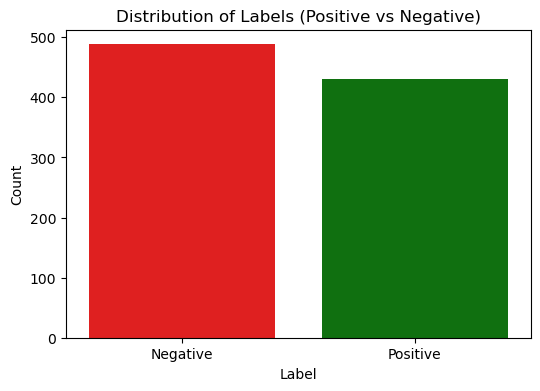

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["Label"], palette={"Positive": "green", "Negative": "red"})
plt.title("Distribution of Labels (Positive vs Negative)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

#### 2. Word Cloud for Positive Articles

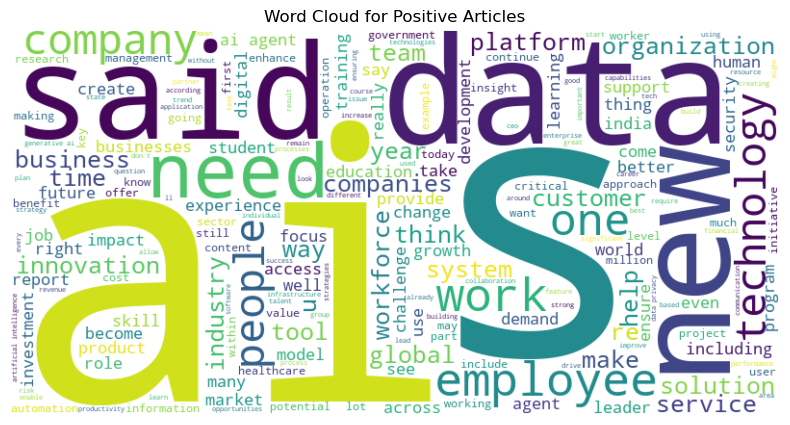

In [15]:
positive_text = " ".join(df[df["Label"] == "Positive"]["content"])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Positive Articles")
plt.show()

####  3. Word Cloud for Negative Articles

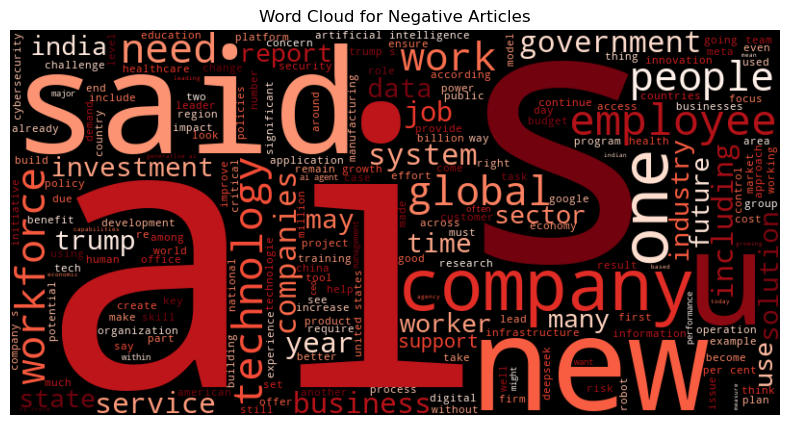

In [16]:
negative_text = " ".join(df[df["Label"] == "Negative"]["content"])
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap="Reds").generate(negative_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Negative Articles")
plt.show()

#### 4. Most Frequent Words in Positive Articles (Bar Chart)

/Users/lohithramesh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


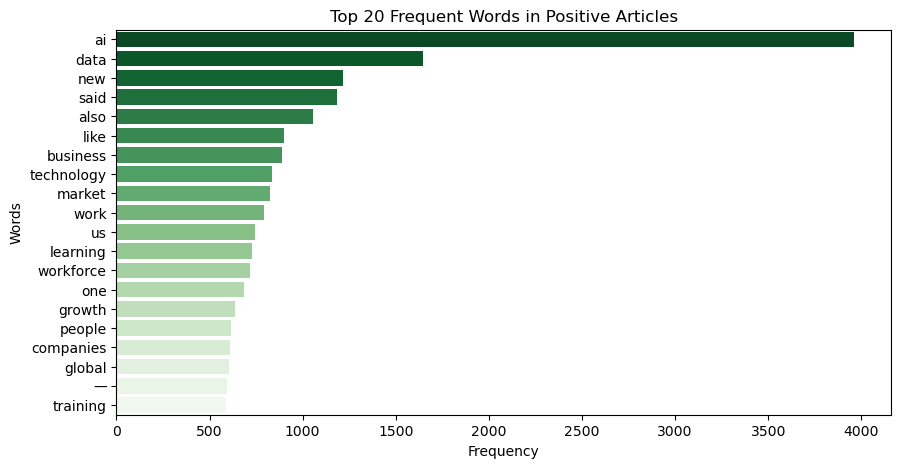

In [17]:
positive_words = " ".join(df[df["Label"] == "Positive"]["content"]).split()
positive_word_counts = Counter(positive_words).most_common(20)

words, counts = zip(*positive_word_counts)
plt.figure(figsize=(10,5))
sns.barplot(x=list(counts), y=list(words), palette="Greens_r")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 20 Frequent Words in Positive Articles")
plt.show()

####  5. Most Frequent Words in Negative Articles (Bar Chart)

/Users/lohithramesh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


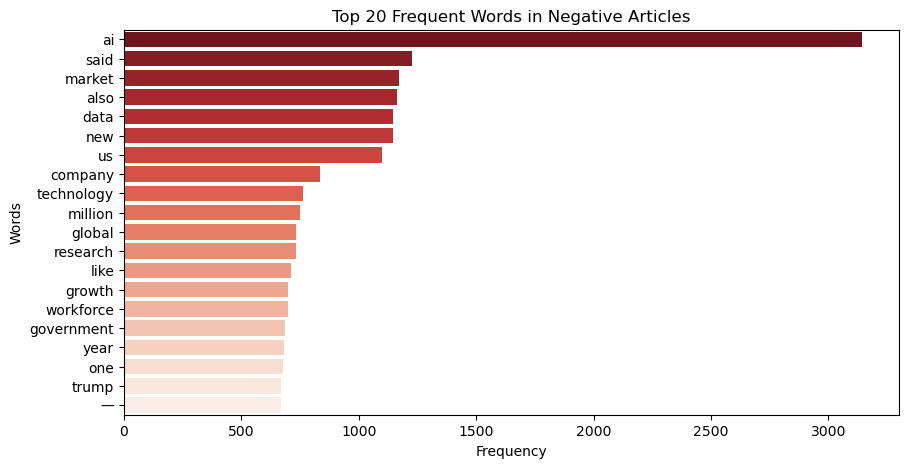

In [18]:
negative_words = " ".join(df[df["Label"] == "Negative"]["content"]).split()
negative_word_counts = Counter(negative_words).most_common(20)

words, counts = zip(*negative_word_counts)
plt.figure(figsize=(10,5))
sns.barplot(x=list(counts), y=list(words), palette="Reds_r")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 20 Frequent Words in Negative Articles")
plt.show()

####  6. Article Length Distribution (Histogram)

/Users/lohithramesh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


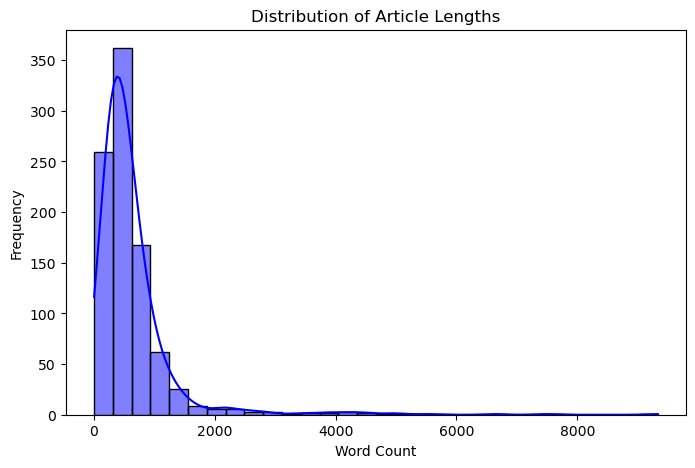

In [19]:
df["text_length"] = df["content"].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
sns.histplot(df["text_length"], bins=30, kde=True, color="blue")
plt.title("Distribution of Article Lengths")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

#### 7. Article Length by Label (Boxplot)

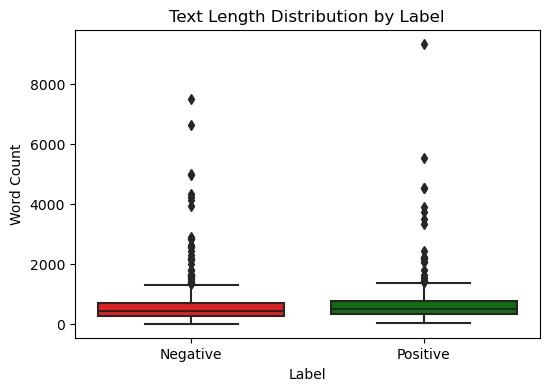

In [20]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Label", y="text_length", data=df, palette={"Positive": "green", "Negative": "red"})
plt.title("Text Length Distribution by Label")
plt.xlabel("Label")
plt.ylabel("Word Count")
plt.show()

#### 8. TF-IDF Feature Extraction

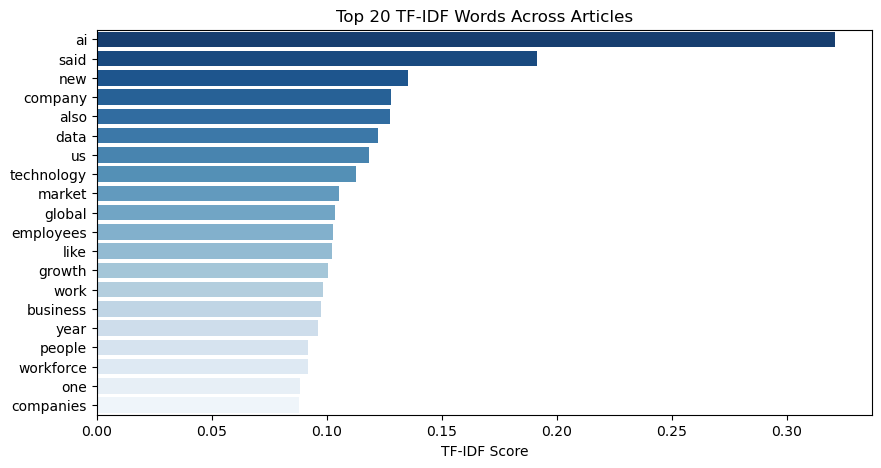

In [21]:
vectorizer = TfidfVectorizer(max_features=20)
tfidf_matrix = vectorizer.fit_transform(df["content"])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Plot the top 20 TF-IDF features
tfidf_means = tfidf_df.mean().sort_values(ascending=False)[:20]
plt.figure(figsize=(10,5))
sns.barplot(x=tfidf_means.values, y=tfidf_means.index, palette="Blues_r")
plt.title("Top 20 TF-IDF Words Across Articles")
plt.xlabel("TF-IDF Score")
plt.show()

#### 9. Bigram Analysis (Most Common Two-Word Phrases)

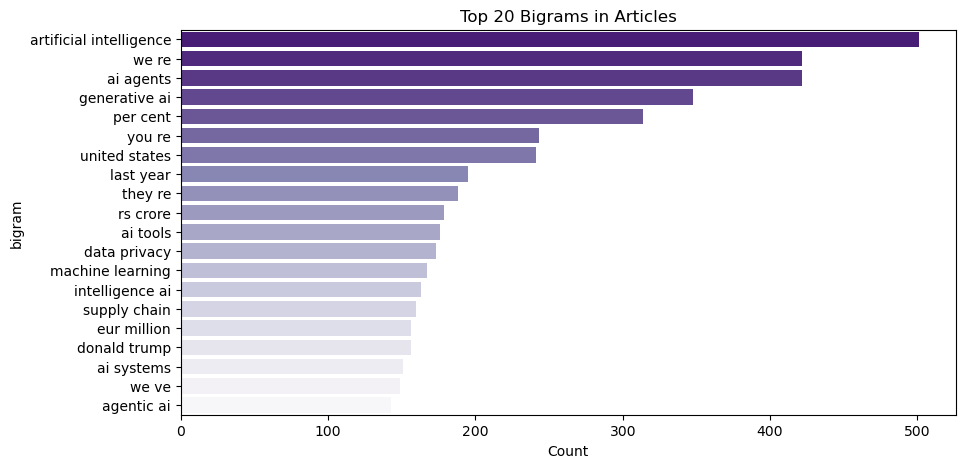

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

bigram_vectorizer = CountVectorizer(ngram_range=(2,2), max_features=20)
bigram_matrix = bigram_vectorizer.fit_transform(df["content"])
bigram_counts = bigram_matrix.toarray().sum(axis=0)

bigrams = bigram_vectorizer.get_feature_names_out()
bigram_df = pd.DataFrame({"bigram": bigrams, "count": bigram_counts}).sort_values(by="count", ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=bigram_df["count"], y=bigram_df["bigram"], palette="Purples_r")
plt.title("Top 20 Bigrams in Articles")
plt.xlabel("Count")
plt.show()

### Step 3: Text Cleaning Techniques

#### (a) Stemming

In [23]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

df_stemming = pd.DataFrame()
df_stemming['Label'] = df['Label']  # Copy the 'Label' column
df_stemming['content'] = df['content'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))  # Apply stemming

df_stemming.head()

,Label,content
0,Negative,macomb detroit michiganpresid donald trump acc...
1,Negative,washington us presid donald trump advis elon m...
2,Positive,associ head coach david patrick lsu tiger men’...
3,Negative,new york yanke offici full squad tampa start s...
4,Negative,among document obtain rnz letter hunt sent nz ...


In [24]:
# Save to CSV
df_stemming.to_csv('/Users/lohithramesh/Desktop/M.S in Data Science/Semester 4/Text Mining/Project/Data/df_stemming.csv', index=False)

#### (b) Lemmatization

In [25]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

df_lemmatization = pd.DataFrame()
df_lemmatization['Label'] = df['Label']  # Copy the 'Label' column
df_lemmatization['content'] = df['content'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))  # Apply lemmatization

df_lemmatization.head()

,Label,content
0,Negative,macomb detroit michiganpresident donald trump ...
1,Negative,washington u president donald trump adviser el...
2,Positive,associate head coach david patrick lsu tiger m...
3,Negative,new york yankee officially full squad tampa st...
4,Negative,among document obtained rnz letter hunt sent n...


In [26]:
# Save to CSV
df_lemmatization.to_csv('/Users/lohithramesh/Desktop/M.S in Data Science/Semester 4/Text Mining/Project/Data/df_lemmatization.csv', index=False)

#### (c) CountVectorizer

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(max_df=0.85, min_df=5, max_features=5000)

X_count = count_vectorizer.fit_transform(df['content'])
df_count_vectorized = pd.DataFrame(X_count.toarray(), columns=count_vectorizer.get_feature_names_out())
df_count_vectorized.insert(0, 'Label', df['Label'])

df_count_vectorized.head()

,Label,ab,abb,abilities,ability,able,abroad,absolute,absolutely,abuse,...,youre,youth,youtube,youve,yoy,zealand,zero,zone,zones,zuckerberg
0,Negative,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Negative,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Positive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Negative,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Negative,0,0,0,1,0,0,0,1,6,...,0,0,1,0,0,4,0,0,0,0


In [29]:
# Save to CSV
df_count_vectorized.to_csv('/Users/lohithramesh/Desktop/M.S in Data Science/Semester 4/Text Mining/Project/Data/df_count_vectorized.csv', index=False)

#### (d) TfidfVectorizer

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.85, min_df=5, max_features=5000)

X_tfidf = tfidf_vectorizer.fit_transform(df['content'])
df_tfidf_vectorized = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
df_tfidf_vectorized.insert(0, 'Label', df['Label'])

df_tfidf_vectorized.head()

,Label,ab,abb,abilities,ability,able,abroad,absolute,absolutely,abuse,...,youre,youth,youtube,youve,yoy,zealand,zero,zone,zones,zuckerberg
0,Negative,0.0,0.0,0.0,0.000000,0.023901,0.0,0.0,0.000000,0.046312,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,Negative,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,Positive,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,Negative,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,Negative,0.0,0.0,0.0,0.015669,0.000000,0.0,0.0,0.027076,0.191413,...,0.0,0.0,0.026004,0.0,0.0,0.121938,0.0,0.0,0.0,0.0


In [32]:
# Save to CSV
df_tfidf_vectorized.to_csv('/Users/lohithramesh/Desktop/M.S in Data Science/Semester 4/Text Mining/Project/Data/df_tfidf_vectorized.csv', index=False)